In [1]:
from sklearn.datasets import load_iris
import  matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris=load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [3]:
features=iris.feature_names
print(features)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
X=iris.data
X.shape

(150, 4)

In [5]:
y=iris.target
print(y.shape)

(150,)


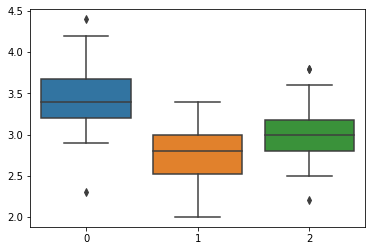

In [6]:
sns.boxplot(x=iris.target , y=iris.data[:,1])

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [9]:
model=LinearRegression()

In [10]:
lin_model=model.fit(X_train,y_train)

In [11]:
print(lin_model.score(X_test,y_test))

0.9507836004866129


In [12]:
predictions=lin_model.predict(X_test)
print(predictions)

[ 1.1271879   2.03075743  0.92809492  1.72320515  1.57591234  1.18592242
  1.14593381  1.55395963 -0.04185404  1.58015738  1.21265409  1.96162383
 -0.14946169 -0.03730772  1.82839787 -0.03940115  1.89646361 -0.12441687
 -0.10018359  2.05815361 -0.08233484  0.84186055  1.77297167  2.01410711
  1.17954005  1.89507642  0.19737457  1.74833342  2.05686793  1.97808972
  1.3892642   0.04273361 -0.21846631 -0.05233819 -0.01766465 -0.09019163
  1.26884848  0.94598757]


In [13]:
!pip install gradio

     |████████████████████████████████| 2.0 MB 5.2 MB/s 
     |████████████████████████████████| 1.9 MB 44.2 MB/s 
     |████████████████████████████████| 206 kB 56.9 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
     |████████████████████████████████| 961 kB 60.6 MB/s 
     |████████████████████████████████| 3.5 MB 45.6 MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4710 sha256=69348523106a85caeb1f0434fe0e19bfbba088571ae2dd4de795aabe5722919c
  Stored in directory: /root/.cache/pip/wheels/13/e4/6c/e8059816e86796a597c6e6b0d4c880630f51a1fcfa0befd5e6
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-py3-none-any.whl size=3371 sha256=f8c20f65d53413172c6008f035f169a39a4503d1bce310174cfd4a1335e00e15
  Stored in directory: /root/.cache/pip/wheels/28/c0/c4/44687421dab41455be93112bd1b0dee1f3c5a9aa27bee63708
Successfully built ffmpy flask-cachebuster


In [14]:
def classify(num):
    if num<0.5:
        return 'Setosa'
    elif num <1.5:
        return 'Versicolor'
    else:
        return 'Virginica'

In [15]:
import gradio as gr
import numpy as np
def predict_flower(sl,sw,pl,pw):
    input_array=np.array([[sl,sw,pl,pw]])
    pred=lin_model.predict(input_array)
    output=classify(pred[0])
    if output=='Setosa':
      return [(0,output)]
    elif output=='Versicolor':
      return [(1,output)]
    else:
      return [(2,output)]

In [ ]:
sl = gr.inputs.Slider(minimum=0, maximum=7, default=2, label="Sepal Length")
sw = gr.inputs.Slider(minimum=0, maximum=7, default=2, label="Sepal Width")
pl = gr.inputs.Slider(minimum=0, maximum=7, default=2, label="Petal Length")
pw = gr.inputs.Slider(minimum=0, maximum=7, default=2, label="Petal Width")
op=gr.outputs.HighlightedText(color_map={ "Setosa": "lightgreen",
        "Versicolor": "pink",
        "Virginica": "yellow",})

gr.Interface(predict_flower, inputs=[sl,sw,pl,pw], outputs=op,live=True).launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://47394.gradio.app

This share link will expire in 72 hours. To get longer links, send an email to: support@gradio.app
